In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/coloc_genes.txt"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/coloc_genes_w_sample_size.txt"
# df = read.csv(filename)
df = read.csv(filename, sep = "\t", header = F)
colnames(df) = c("gwas_trait","gene_name","eqtl_map","top_GTEx_brain","top_GTEx_non_brain","category")
# df$X = c()
head(df)

gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category
Neuroticism,LRRC37A2,qtl_results_NONE_DA_all,Brain_Cerebellar_Hemisphere,Esophagus_Muscularis,N
Depressed affect,LRRC37A2,qtl_results_NONE_DA_all,Brain_Hypothalamus,Heart_Atrial_Appendage,N
Neuroticism,POLR3H,qtl_results_NONE_DA_all,Brain_Nucleus_accumbens_basal_ganglia,Esophagus_Mucosa,N
Neuroticism,FANCL,qtl_results_NONE_DA_all,Brain_Cerebellar_Hemisphere,Pancreas,N
Depressed affect,ANKZF1,qtl_results_NONE_DA_all,Brain_Hypothalamus,Whole_Blood,N
Cognitive performance,AHSA1,qtl_results_NONE_DA_all,Brain_Frontal_Cortex_BA9,Cells_Transformed_fibroblasts,N


In [3]:
# df = df[df$category == 'N',]

In [4]:
df$eqtl_map = as.character(df$eqtl_map)
df$eqtl_map = gsub(".qtl_results_all","",df$eqtl_map)
df$eqtl_map = gsub("qtl_results_","",df$eqtl_map)
df$eqtl_map = gsub("_all","",df$eqtl_map)
unique(df$eqtl_map)

[1] "NONE_DA"                  "ROT_DA"                  
 [3] "pool1_13_noddd_D30.DA"    "NONE_Sert"               
 [5] "ROT_Sert"                 "pool1_13_noddd_D30.Sert" 
 [7] "NONE_Epen1"               "ROT_Epen1"               
 [9] "pool1_13_noddd_D30.Epen1" "NONE_Astro"              
[11] "ROT_Astro"                "pool1_13_noddd_D30.Astro"
[13] "pool1_13_noddd_D11.FPP"   "pool1_13_noddd_D11.P_FPP"
[15] "pool1_13_noddd_D11.NB"

In [5]:
df = df %>% mutate(eqtl_map = factor(eqtl_map, levels=c("pool1_13_noddd_D11.FPP","pool1_13_noddd_D11.P_FPP",
                                                   "pool1_13_noddd_D11.NB",
                                                   "pool1_13_noddd_D30.Astro","pool1_13_noddd_D30.DA",
                                                   "pool1_13_noddd_D30.Sert","pool1_13_noddd_D30.Epen1",
                                                   "NONE_DA","NONE_Sert","NONE_Epen1","NONE_Astro",
                                                   "ROT_DA","ROT_Sert","ROT_Epen1","ROT_Astro")))

In [6]:
df$condition = c()
df$condition[grep('D11',df$eqtl_map)] = 'D11'
df$condition[grep('D30',df$eqtl_map)] = 'D30'
df$condition[grep('NONE',df$eqtl_map)] = 'D52'
df$condition[grep('ROT',df$eqtl_map)] = 'D52_ROT'
head(df)

gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category,condition
Neuroticism,LRRC37A2,NONE_DA,Brain_Cerebellar_Hemisphere,Esophagus_Muscularis,N,D52
Depressed affect,LRRC37A2,NONE_DA,Brain_Hypothalamus,Heart_Atrial_Appendage,N,D52
Neuroticism,POLR3H,NONE_DA,Brain_Nucleus_accumbens_basal_ganglia,Esophagus_Mucosa,N,D52
Neuroticism,FANCL,NONE_DA,Brain_Cerebellar_Hemisphere,Pancreas,N,D52
Depressed affect,ANKZF1,NONE_DA,Brain_Hypothalamus,Whole_Blood,N,D52
Cognitive performance,AHSA1,NONE_DA,Brain_Frontal_Cortex_BA9,Cells_Transformed_fibroblasts,N,D52


In [7]:
df$time_point = df$condition
df$time_point[df$condition == "D52_ROT"] = 'D52'
df$treatment = 'NONE'
df$treatment[df$condition == "D52_ROT"] = 'ROT'
tail(df)

,gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category,condition,time_point,treatment
1075,College or University degree | Qualifications,NIPSNAP1,pool1_13_noddd_D11.P_FPP,Brain_Anterior_cingulate_cortex_BA24,Thyroid,N-B-O,D11,D11,NONE
1076,A levels/AS levels or equivalent | Qualifications,CHST10,pool1_13_noddd_D11.P_FPP,Brain_Cerebellar_Hemisphere,Heart_Atrial_Appendage,N-B-O,D11,D11,NONE
1077,PD,TTC19,pool1_13_noddd_D11.P_FPP,Brain_Hippocampus,Cells_EBV-transformed_lymphocytes,N-B-O,D11,D11,NONE
1078,PD,NUPL2,pool1_13_noddd_D11.P_FPP,Brain_Cerebellum,Cells_Transformed_fibroblasts,N-B-O,D11,D11,NONE
1079,Sleeplessness / insomnia,HEXIM1,pool1_13_noddd_D11.NB,Brain_Frontal_Cortex_BA9,Nerve_Tibial,N-B-O,D11,D11,NONE
1080,PD,ZSWIM7,pool1_13_noddd_D11.NB,Brain_Cerebellar_Hemisphere,Vagina,N-B-O,D11,D11,NONE


In [8]:
df$celltype = df$condition
df$celltype[grep('FPP',df$eqtl_map)] = 'FPP'
df$celltype[grep('P_FPP',df$eqtl_map)] = 'P_FPP'
df$celltype[grep('NB',df$eqtl_map)] = 'NB'
df$celltype[grep('DA',df$eqtl_map)] = 'DA'
df$celltype[grep('Sert',df$eqtl_map)] = 'Sert'
df$celltype[grep('Epen1',df$eqtl_map)] = 'Epen1'
df$celltype[grep('Astro',df$eqtl_map)] = 'Astro'
df$celltype[df$celltype == 'Astro' & df$condition == 'D30'] = 'FPP'
head(df)

gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category,condition,time_point,treatment,celltype
Neuroticism,LRRC37A2,NONE_DA,Brain_Cerebellar_Hemisphere,Esophagus_Muscularis,N,D52,D52,NONE,DA
Depressed affect,LRRC37A2,NONE_DA,Brain_Hypothalamus,Heart_Atrial_Appendage,N,D52,D52,NONE,DA
Neuroticism,POLR3H,NONE_DA,Brain_Nucleus_accumbens_basal_ganglia,Esophagus_Mucosa,N,D52,D52,NONE,DA
Neuroticism,FANCL,NONE_DA,Brain_Cerebellar_Hemisphere,Pancreas,N,D52,D52,NONE,DA
Depressed affect,ANKZF1,NONE_DA,Brain_Hypothalamus,Whole_Blood,N,D52,D52,NONE,DA
Cognitive performance,AHSA1,NONE_DA,Brain_Frontal_Cortex_BA9,Cells_Transformed_fibroblasts,N,D52,D52,NONE,DA


In [9]:
# write.csv(df, filename, quote = F)

In [10]:
leads = df
leads$label = paste0(leads$celltype,"_",leads$condition)
unique(leads$label)

[1] "DA_D52"        "DA_D52_ROT"    "DA_D30"        "Sert_D52"     
 [5] "Sert_D52_ROT"  "Sert_D30"      "Epen1_D52"     "Epen1_D52_ROT"
 [9] "Epen1_D30"     "Astro_D52"     "Astro_D52_ROT" "FPP_D30"      
[13] "FPP_D11"       "P_FPP_D11"     "NB_D11"

In [11]:
leads$coloc_id = paste0(leads$gene_name,"-",leads$gwas_trait)
head(leads$coloc_id)

[1] "LRRC37A2-Neuroticism"        "LRRC37A2-Depressed affect"  
[3] "POLR3H-Neuroticism"          "FANCL-Neuroticism"          
[5] "ANKZF1-Depressed affect"     "AHSA1-Cognitive performance"

In [12]:
# FPP & P_FPP
D11 = leads[leads$label == "FPP_D11",]
D30 = leads[leads$label == "FPP_D30",]
P_FPP = leads[leads$label == "P_FPP_D11",]

egenes0 = unique(D11$coloc_id)
egenes1 = unique(D30$coloc_id)
egenes2 = unique(P_FPP$coloc_id)
##
D11 = c(length(egenes0),length(unique(c(egenes0,egenes1))),length(egenes2))
D11

[1]  90 163 114

In [13]:
# DA
D30 = leads[leads$label == "DA_D30",]
D52 = leads[leads$label == "DA_D52",]
D52_r = leads[leads$label == "DA_D52_ROT",]
egenes30 = unique(D30$coloc_id)
egenes = unique(D52$coloc_id)
egenesROT = unique(D52_r$coloc_id)
##
DA = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))
DA

[1]  57 117 157

In [153]:
# Sert
D30 = leads[leads$label == "Sert_D30",]
D52 = leads[leads$label == "Sert_D52",]
D52_r = leads[leads$label == "Sert_D52_ROT",]
egenes30 = unique(D30$coloc_id)
egenes = unique(D52$coloc_id)
egenesROT = unique(D52_r$coloc_id)
##
Sert = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))
Sert

[1]  73 166 280

In [154]:
# Epen1
D30 = leads[leads$label == "Epen1_D30",]
D52 = leads[leads$label == "Epen1_D52",]
D52_r = leads[leads$label == "Epen1_D52_ROT",]
egenes30 = unique(D30$coloc_id)
egenes = unique(D52$coloc_id)
egenesROT = unique(D52_r$coloc_id)
##
Epen1 = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))
Epen1

[1]  67 150 217

In [155]:
# Astro
D52 = leads[leads$label == "Astro_D52",]
D52_r = leads[leads$label == "Astro_D52_ROT",]
egenes = unique(D52$coloc_id)
egenesROT = unique(D52_r$coloc_id)
##
Astro = c(length(egenes),length(unique(c(egenes,egenesROT))))
Astro

[1]  56 111

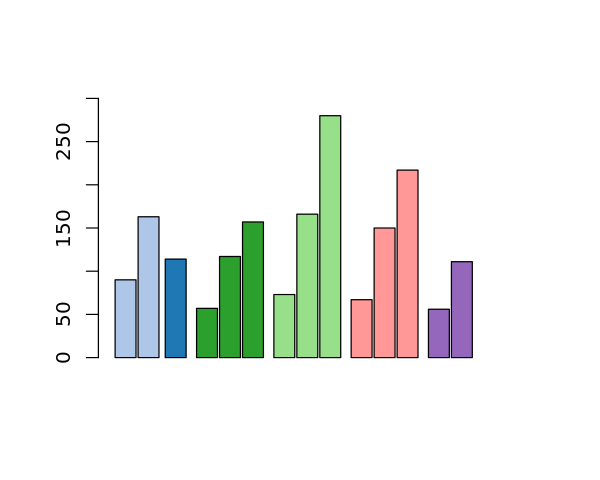

In [156]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

options(repr.plot.width = 5, repr.plot.height = 4)
my.xlim = c(0, 300)
my.ylim = c(0,20)
my.space = c(0,0.1,0.3,0.5, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5,0.1, 0.1,0.5,0.1)
opar <- par(lwd = 1)

barplot(c(D11,DA,Sert,Epen1,Astro),xlim = my.ylim, ylim = my.xlim, space = my.space,
       col = c(col_FPP,   col_FPP, col_P_FPP,
               col_DA,    col_DA,    col_DA, 
               col_Sert,  col_Sert,  col_Sert, 
               col_Epen1, col_Epen1, col_Epen1, 
               col_Astro, col_Astro))#,
#        border = c("lightgrey","darkgray","black", 
#                   "lightgrey","darkgray","black",  
#                   "lightgrey","darkgray","black", 
#                   "lightgrey","darkgray","black"))

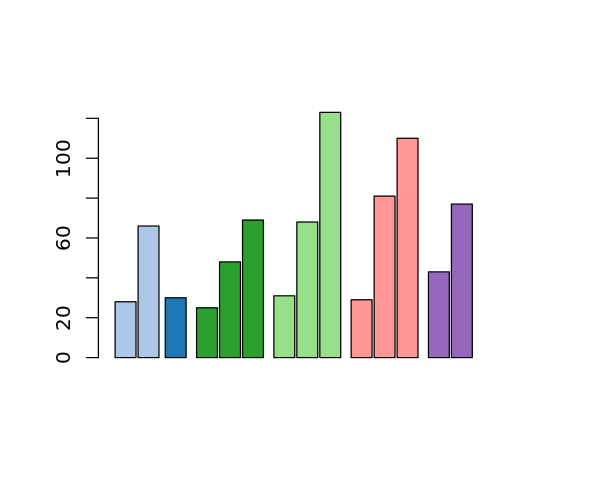

In [89]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

options(repr.plot.width = 5, repr.plot.height = 4)
my.xlim = c(0, 130)
my.ylim = c(0,20)
my.space = c(0,0.1,0.3,0.5, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5,0.1, 0.1,0.5,0.1)
opar <- par(lwd = 1)

barplot(c(D11,DA,Sert,Epen1,Astro),xlim = my.ylim, ylim = my.xlim, space = my.space,
       col = c(col_FPP,   col_FPP, col_P_FPP,
               col_DA,    col_DA,    col_DA, 
               col_Sert,  col_Sert,  col_Sert, 
               col_Epen1, col_Epen1, col_Epen1, 
               col_Astro, col_Astro))#,
#        border = c("lightgrey","darkgray","black", 
#                   "lightgrey","darkgray","black",  
#                   "lightgrey","darkgray","black", 
#                   "lightgrey","darkgray","black"))